 # Perceptron from scratch using numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.RandomState(1).normal(0,1)  # replicamos

1.6243453636632417

If we run the above cell some times, then we will have the same output ( a seed is requiered).

np.random.normal() extract samples from a gaussian distribution.

the parameters loc and scale are mean and standard deviation respectively. size return the number of samples.

In [2]:
np.random.normal(loc = 0, scale=1, size=5)

array([ 1.05577503, -2.66708015,  0.68866064,  0.5283283 , -0.64877004])

*Zip*  is a built in function that return tuples with the shortest iterable objects, the * is the unzip operator.



In [3]:
color = ['black','green', 'blue']
code = [1,2]
joint = list(zip(color,code))
a,b = zip(*joint) # Unzip operator
print(a,b)

('black', 'green') (1, 2)


In [4]:
bool(1)

True

Boolean True 1 and False 0
int(True)  is equal to one and int(False) equal to zero.

The dot product of two vectors in a analytical way take sense when you think in a coordinate system then
$\vec{x}.\vec{y} = \sum x_{i} y_{i}$
the i-th element of each vector is added.

In [5]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
np.dot(x,y)

55

# A linear classifier

\begin{equation}
f(x) = w^{t} \mathbf{x} = w_{0} + w_{1}x_{1} + ... + w_{n}x_{n}
\end{equation}

```pyton
np.dot(w[1:], x)+ w[0]
```

# Treshold
np.where( condition(z) , 1 ,-1)
z is n-array and return 1 when the condition () is satisfied and -1 in otherwise.

In [6]:
a = np.array((1,3,3,4))
np.where(a>1,'99','0')

array(['0', '99', '99', '99'], dtype='<U2')

In [7]:
def net_input(X,w_):
  return np.dot(X,w_[1:]) + w_[0]

In [8]:
def predict(X, w_):
  return np.where(net_input(X, w_) >= 0,1,-1)  # This is the activation function.

[4, 2, 3, 2, 2, 1, 3, 2, 1, 0]


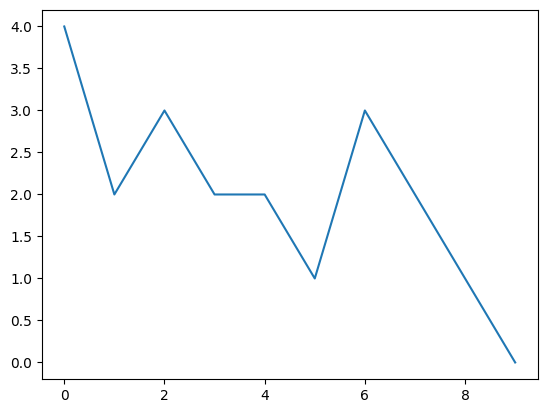

In [9]:
# data = [[1,2,3,4],[10,11,12,5],[11,23,44,22],[11,12,34,44],[1,1,1,0],[10,5,3,1]]
data = [[1,2,3,4],[10,11,12,5],[11,23,44,22],[88,12,34,44],[1,1,1,0]]
y = np.array((1,-1,1,1,-1))
X = np.array(data)
w_= np.random.RandomState(9).normal(size=X.shape[1]+1)   #que  hacemos?
epochs = 10
def fit(X, y, eta=1,epochs=epochs):
  errores =[]
  for _ in range(epochs):
    bias = 0
    for xi, cat in zip(X,y):
      update = eta * (cat - predict(xi, w_)) #if macth then update is equall to zero
      w_[1:] +=  update * xi   #equal to w_[1:] = w_[1:] + update*xi
      w_[0] += update
      bias += int(update!=0.0)
    errores.append(bias)
  return errores
e=fit(X,y)
print(e)
plt.plot(range(0,epochs),e)

think that each xi correspond to a vector of features, for the i-th sample.


In [10]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url , header=None)
print(df.head())
print(df.shape)
y = df[4].values
y = np.where(y=='Iris-setosa',-1,1)
X = df.iloc[:,[1,2]].values
# now using sklearn implement a perceptron ( see the slide j-th )

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
(150, 5)


In [11]:
from sklearn.linear_model import Perceptron
model = Perceptron(penalty=None , max_iter=1000, eta0=0.4, random_state=1)
model.fit(X,y)
print(model.score(X,y)) # Print the number of matches
from sklearn.metrics import confusion_matrix
# confusion_matrix(y, model.predict(X))
print(model.coef_)

1.0
[[-2.24  2.32]]
